In [20]:
# Import everything
import os
import glob
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
from models import *

In [2]:
# Prepare InverseRenderNet
inverse_render_net = InverseRenderNet()
inverse_render_net.build(input_shape=(None, 200, 200, 3))
inverse_render_net.load_weights('pretrained/inverse_render_net/')

image (200, 355, 3) 0.9529411764705878 0.0


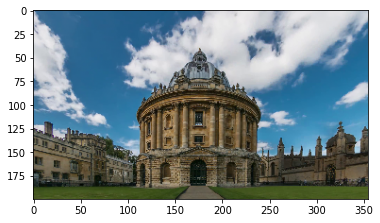

mask (200, 355, 3) 1.0 0.0


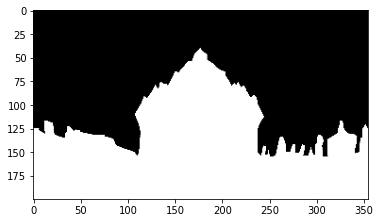

albedo (200, 355, 3) 0.88396764 1e-04


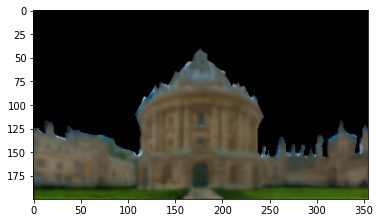

normal (200, 355, 3) 0.9999947 -0.9959288


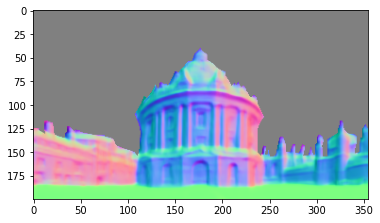

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
shadow (200, 355, 3) 1.0001 1e-04


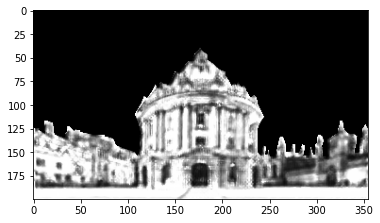

In [16]:
IMAGE_PATH, MASK_PATH = 'images/1.png', 'images/mask.png'
# Read images
image = imread(IMAGE_PATH)[..., :3]
mask = imread(MASK_PATH) if MASK_PATH else np.ones_like(image)
mask = mask if mask.ndim == 3 else np.tile(mask[..., None], (1, 1, 3))
# Resize images
img_h, img_w = image.shape[:2]
scale = 200 / min(img_h, img_w)
img_h, img_w = int(img_h * scale), int(img_w * scale)
image = resize(image, (img_h, img_w))
mask = resize(mask, (img_h, img_w))
# Show images
print('image', image.shape, image.max(), image.min())
plt.imshow(image)
plt.show()
print('mask', mask.shape, mask.max(), mask.min())
plt.imshow(mask, cmap='gray')
plt.show()
# Forward
albedo, normal, shadow = inverse_render_net.predict(image[None] * mask[None])
albedo, normal, shadow = inverse_render_net.post_process(albedo, normal, shadow, mask)
albedo, normal, shadow = albedo[0], normal[0], shadow[0]
# Show results
print('albedo', albedo.shape, albedo.numpy().max(), albedo.numpy().min())
plt.imshow(albedo)
plt.show()
print('normal', normal.shape, normal.numpy().max(), normal.numpy().min())
plt.imshow(np.uint8(128 * (normal + 1)))
plt.show()
print('shadow', shadow.shape, shadow.numpy().max(), shadow.numpy().min())
plt.imshow(shadow, cmap='gray')
plt.show()

image (200, 299, 3) 0.9176470588235294 0.08235294117647059


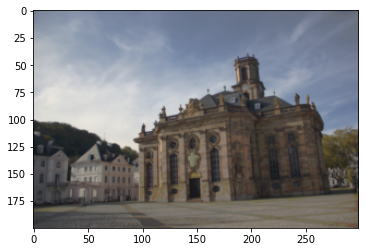

mask (200, 299, 3) 1.0 1.0


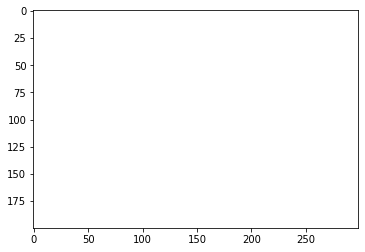

albedo (200, 299, 3) 0.8240253 0.0013482702


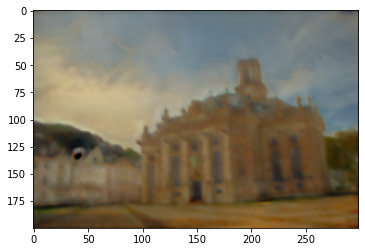

normal (200, 299, 3) 0.99999654 -0.9999981


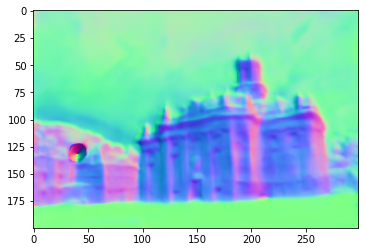

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
shadow (200, 299, 3) 1.0001 0.044346467


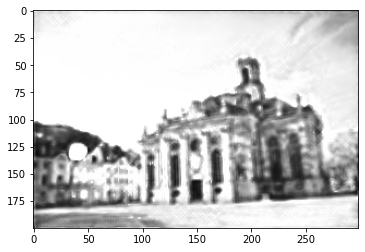

In [19]:
IMAGE_PATH, MASK_PATH = 'data/C6_4_5.png', None
# Read images
image = imread(IMAGE_PATH)[..., :3]
# Resize images
img_h, img_w = image.shape[:2]
scale = 200 / min(img_h, img_w)
img_h, img_w = int(img_h * scale), int(img_w * scale)
image = resize(image, (img_h, img_w))
if MASK_PATH is not None:
    mask = imread(MASK_PATH)
    mask = mask if mask.ndim == 3 else np.tile(mask[..., None], (1, 1, 3))
    mask = resize(mask, (img_h, img_w))
else:
    mask = np.ones_like(image)
# Show images
print('image', image.shape, image.max(), image.min())
plt.imshow(image)
plt.show()
print('mask', mask.shape, mask.max(), mask.min())
plt.imshow(mask, cmap='gray')
plt.show()
# Forward
albedo, normal, shadow = inverse_render_net.predict(image[None] * mask[None])
albedo, normal, shadow = inverse_render_net.post_process(albedo, normal, shadow, mask)
albedo, normal, shadow = albedo[0], normal[0], shadow[0]
# Show results
print('albedo', albedo.shape, albedo.numpy().max(), albedo.numpy().min())
plt.imshow(albedo)
plt.show()
print('normal', normal.shape, normal.numpy().max(), normal.numpy().min())
plt.imshow(np.uint8(128 * (normal + 1)))
plt.show()
print('shadow', shadow.shape, shadow.numpy().max(), shadow.numpy().min())
plt.imshow(shadow, cmap='gray')
plt.show()